#### Reading and Describing Data

In [1]:
#Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [4]:
# Get statistics on the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


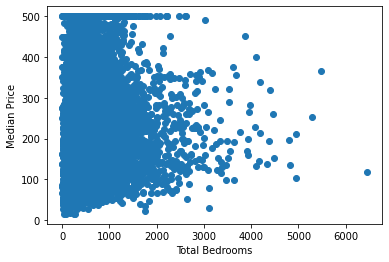

In [8]:
# Finding Outliers/Skewness
plt.scatter(training_df['total_bedrooms'], training_df['median_house_value'])
plt.xlabel('Total Bedrooms')
plt.ylabel('Median Price')
plt.show()

#### Building and Training Model

In [16]:
# Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [13]:
# Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/30
567/567 [==============================] - 1s 862us/step - loss: 29240.5938 - root_mean_squared_error: 170.9988
Epoch 2/30
567/567 [==============================] - 0s 826us/step - loss: 27545.3262 - root_mean_squared_error: 165.9678 0s - loss: 28202.0703 - root_mean_squared_error: 16
Epoch 3/30
567/567 [==============================] - 0s 789us/step - loss: 26977.1719 - root_mean_squared_error: 164.2473
Epoch 4/30
567/567 [==============================] - 1s 1ms/step - loss: 26122.1562 - root_mean_squared_error: 161.6235
Epoch 5/30
567/567 [==============================] - 1s 1ms/step - loss: 25296.7422 - root_mean_squared_error: 159.0495
Epoch 6/30
567/567 [==============================] - 1s 1ms/step - loss: 24960.6348 - root_mean_squared_error: 157.9893
Epoch 7/30
567/567 [==============================] - 1s 1ms/step - loss: 24479.8906 - root_mean_squared_error: 156.4605
Epoch 8/30
567/567 [==============================] - 1s 992us/step - loss: 23796.9648 - root_m

C:\Users\visha\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


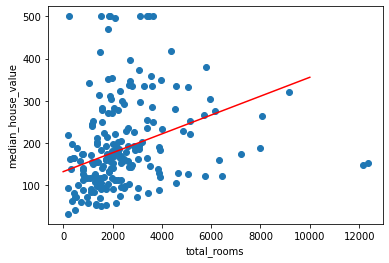

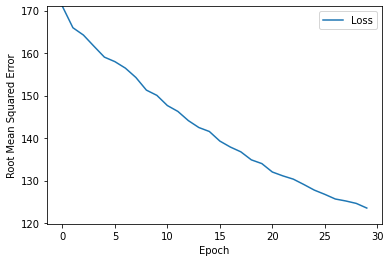

In [17]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

#### Predicting House Values

In [19]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [21]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             176
 3400     92             209
 3677     69             215
 2202     62             182
 2403     80             186
 5652    295             259
 3318    500             207
 2552    342             190
 1364    118             163
 3468    128             210


#### Trying Another Features

Epoch 1/18
5667/5667 [==============================] - 6s 952us/step - loss: 45362.5078 - root_mean_squared_error: 212.9848
Epoch 2/18
5667/5667 [==============================] - 6s 975us/step - loss: 19678.4902 - root_mean_squared_error: 140.2800
Epoch 3/18
5667/5667 [==============================] - 5s 942us/step - loss: 18366.2148 - root_mean_squared_error: 135.5220
Epoch 4/18
5667/5667 [==============================] - 6s 1ms/step - loss: 17845.3242 - root_mean_squared_error: 133.5864
Epoch 5/18
5667/5667 [==============================] - 6s 975us/step - loss: 18704.4648 - root_mean_squared_error: 136.7643
Epoch 6/18
5667/5667 [==============================] - 5s 967us/step - loss: 18158.8008 - root_mean_squared_error: 134.7546
Epoch 7/18
5667/5667 [==============================] - 6s 1ms/step - loss: 17786.9980 - root_mean_squared_error: 133.3679
Epoch 8/18
5667/5667 [==============================] - 5s 950us/step - loss: 18001.7070 - root_mean_squared_error: 134.1704
Epoc

C:\Users\visha\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


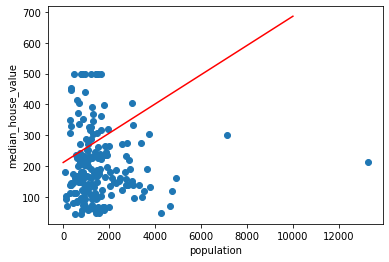

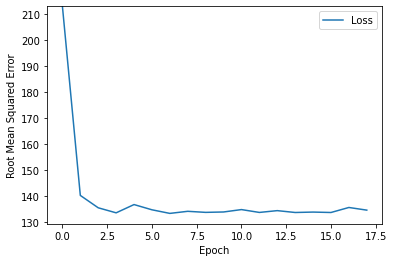

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             272
 1867     92             300
 2191     69             315
 1052     62             261
 1647     80             289
 2312    295             321
 1604    500             287
 1066    342             262
  338    118             227
 1604    128             287


In [24]:
my_feature = "population" # Pick a feature other than "total_rooms"

# Possibly, experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

#### Creating Synthetic Features

Epoch 1/24
567/567 [==============================] - 1s 1ms/step - loss: 38496.2656 - root_mean_squared_error: 196.2047
Epoch 2/24
567/567 [==============================] - ETA: 0s - loss: 19384.9219 - root_mean_squared_error: 139.229 - 1s 1ms/step - loss: 19202.3145 - root_mean_squared_error: 138.5724
Epoch 3/24
567/567 [==============================] - 1s 2ms/step - loss: 15045.8311 - root_mean_squared_error: 122.6614A: 0s - loss: 14585.5449 - root_mean_squared_error: 120.
Epoch 4/24
567/567 [==============================] - 1s 1ms/step - loss: 14814.2637 - root_mean_squared_error: 121.7139
Epoch 5/24
567/567 [==============================] - 1s 1ms/step - loss: 14608.0479 - root_mean_squared_error: 120.8638
Epoch 6/24
567/567 [==============================] - 1s 1ms/step - loss: 14478.6768 - root_mean_squared_error: 120.3274
Epoch 7/24
567/567 [==============================] - 1s 1ms/step - loss: 14342.1230 - root_mean_squared_error: 119.7586
Epoch 8/24
567/567 [=============

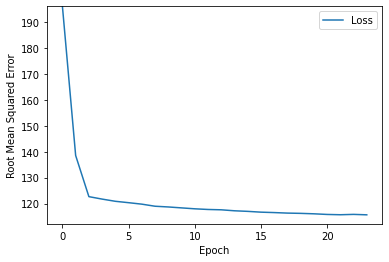

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             190
    2     92             201
    2     69             196
    2     62             212
    1     80             187
    2    295             226
    2    500             211
    2    342             224
    4    118             289
    2    128             215
    2    187             225
    3     80             235
    2    112             226
    2     95             220
    2     69             211


In [28]:
# Define a synthetic feature
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)

#### Finding Feature with Correlation

In [30]:
# Generate a correlation matrix.
training_df.corr()
# 1.0: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
#-1.0: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
# 0.0: no correlation; the two columns are not linearly related.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


Epoch 1/15
1700/1700 [==============================] - 2s 786us/step - loss: 7437.0435 - root_mean_squared_error: 86.2383
Epoch 2/15
1700/1700 [==============================] - 1s 706us/step - loss: 7079.8740 - root_mean_squared_error: 84.1420
Epoch 3/15
1700/1700 [==============================] - 1s 763us/step - loss: 7090.2661 - root_mean_squared_error: 84.2037
Epoch 4/15
1700/1700 [==============================] - 2s 885us/step - loss: 7080.6943 - root_mean_squared_error: 84.1469
Epoch 5/15
1700/1700 [==============================] - 2s 926us/step - loss: 7081.4341 - root_mean_squared_error: 84.1513 0s - loss: 7189.7212 - root_mean_squared_
Epoch 6/15
1700/1700 [==============================] - 2s 884us/step - loss: 7090.6660 - root_mean_squared_error: 84.2061
Epoch 7/15
1700/1700 [==============================] - 1s 874us/step - loss: 7083.1719 - root_mean_squared_error: 84.1616
Epoch 8/15
1700/1700 [==============================] - 2s 885us/step - loss: 7071.7241 - root_me

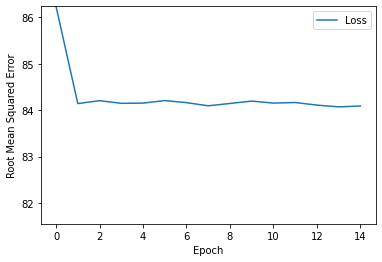

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             133
    4     92             213
    3     69             153
    2     62             130
    3     80             152
    2    295             147
   10    500             468
    5    342             263
    2    118             146
    4    128             223
    8    187             405
    3     80             162
    3    112             179
    4     95             223
    2     69             142


In [34]:
my_feature = "median_income"

# Tune the hyperparameters.
learning_rate = 0.9
epochs = 15
batch_size = 10

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)